# Gamma–Spektrometrie
## Tobias Lapp und Sven Brieden
### duchgeführt am 04.12.17 mit Milan Spasovic

## 1. Einleitung und Zusammenfassung
Radioaktivität ist ein grundlegender Umwandlungsprozess in der Natur der Elemente und ein wichtiger Teil der Welt, wie sie nun existiert. Bei diesen Prozessen geben Atomkerne Energie unter anderem als Gammastrahlen ab. Im folgenden Protokoll werden Messmethoden der Spektroskopie und Spektrometrie zur Analyse von Gammastrahlung genutzt. Unter Verwendung eines High-Purity-Germanium-Detektors wird die Aktivität verschiedener radioaktive Proben bestimmt und damit das Verständnis der Radioaktivität vertieft. 

Der Weg von der zu Grunde liegenden Theorie bis hin zur Aufnahme der Messwerte bzw.deren Auswertung wird nun kapitelweise erläutert.

## 2. Grundlagen
### 2.1 Eigenschaften der Gammastrahlung
Gammastrahlung ist eine beim Kernzerfall auftretende elektromagnetische Strahlung. In der Liste der ionisierenden Strahlung mit Alphastrahlung, Betastrahlung ist sie die durchdringenste Strahlung. Die Gammastrahlung dem Gammazerfall zugeordnet, wobei der Name falsch ist. Es handelt es sich beim Gammerzerfall um keinen Zerfall, da die Anzahl der Neutronen und Protonen des Kern sich nicht verändert. Gammastrahlung entstehen aus der Energie, die ein angeregter Kern (nach α- oder β-Zerfall) beim Übergang zu einem weniger angeregtem Zustand abgibt. In diesem Kapitel werden die für den Versuch wichtigen Eigenschaften beschrieben.

#### 2.1.1 Energiebereich
Elektromagnetische Strahlung mit einer hν = ∆E ≥ 200 keV wird als Gammastrahlung bezeichnet. Das entspricht einer Wellenlänge von ν ≤ 5 pm = 5 · 10 −12 m. Diese Energie ist höher als die von Röntgenstrahlung.

#### 2.1.2 spektrale Verteilung
Die Halbwertsbreiten von unter 0, 3 eV ist für Photonenenergien sehr klein. Diese scharfe Energie lässt sich durch die Lebensdauer des Gammaübergangs erklären, die durch eine geringe Übergangswahrscheinlichkeit sehr lang ist. Die Wellenlänge eines Gammastrahl ist charakteristisch für den jeweiligen Kern. Dadurch lässt sich mittels der Gammaspektroskopie die Zusammensetztung einer Probe herausfinden.

In [1]:
"""
Styleguide:
 - Variablen mit einem Unterstrich beginnend haben Werte / sind Zahlen
 - Variablen ohne Unterstrich beginnend sind "unbezahlte" Rechenvariablen
Beispiel
v = lambda s,t: s/t
_s = 3 #m
_t = 2 #s
_v = v(_s, _t) #m/s
"""

import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from IPython.display import HTML, display, Math, Latex
import astropy.units as astru
from scipy.optimize import curve_fit
import sympy as sp

%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 20

def tabelle_darstellen(data):
    """Eine Funktion, die Tabellen und Arrays schön darstellt"""
    display(HTML(
        '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
            )
     ))

def Fehlerfunktionsgenerator(funktion, variablen, name_funktion, name_ableitung):
    """Eine Funktion, die automatisch die Fehlerformel generiert
    orientiert bei https://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/Fehlerrechnung.html
    """
    fehler = 0
    fehlersymbole=[]
    ableitungen_quadr = []

    for var in variablen:
        d = sp.symbols('d' + var.name)        #Symbole fuer die Fehler generieren
        fehlersymbole.append(d)               #Fehlersymbole in Liste eintragen
        partial = sp.diff(funktion, var) * d  #Partielle Differentation und mit mit Fehlersymbol 'd' multiplizieren
        ableitungen_quadr.append(partial**2)  
        fehler = fehler + partial**2

    fehler_abs=sp.sqrt(fehler)              #Latex Format fuer den absoluten Fehler
    fehler_abs_vereinfacht=sp.simplify(sp.sqrt(fehler))              #Latex Format fuer den absoluten Fehler
    
    print('Funktion: ', name_funktion,)
    display(Math("="+sp.latex(funktion)))
    print('Absoluter Fehler:', name_ableitung," = Δ", name_funktion)
    display(Math("="+sp.latex(fehler_abs).replace('d',r'\Delta ') +'='+sp.latex(fehler_abs_vereinfacht).replace('d',r'\Delta ')))   #Formel absoluter Fehler
    return fehler_abs_vereinfacht

## 3. Durchführung und Auswertung
### 3.1. Bestimmung der Untergrundsunterdrückung durch die Bleiburg
Zur Einschätzung der Untergrundstrahlung vergleichen wir nun zwei Messungen, bei denen sich keine radioaktive Probe in der Nähe des Messaufbaus befunden hat. Um aussagekrätfige Ergebnisse zu bekommen, müssen diese Messungen mehrere Stunde laufen. Die Untergrundmessung außerhalb der Bleiburg lag bereits vor. Die Langzeitmessung in der Bleiburg haben wir nach allen anderen Messungen gestartet und bis zum nächsten Tag laufen lassen.

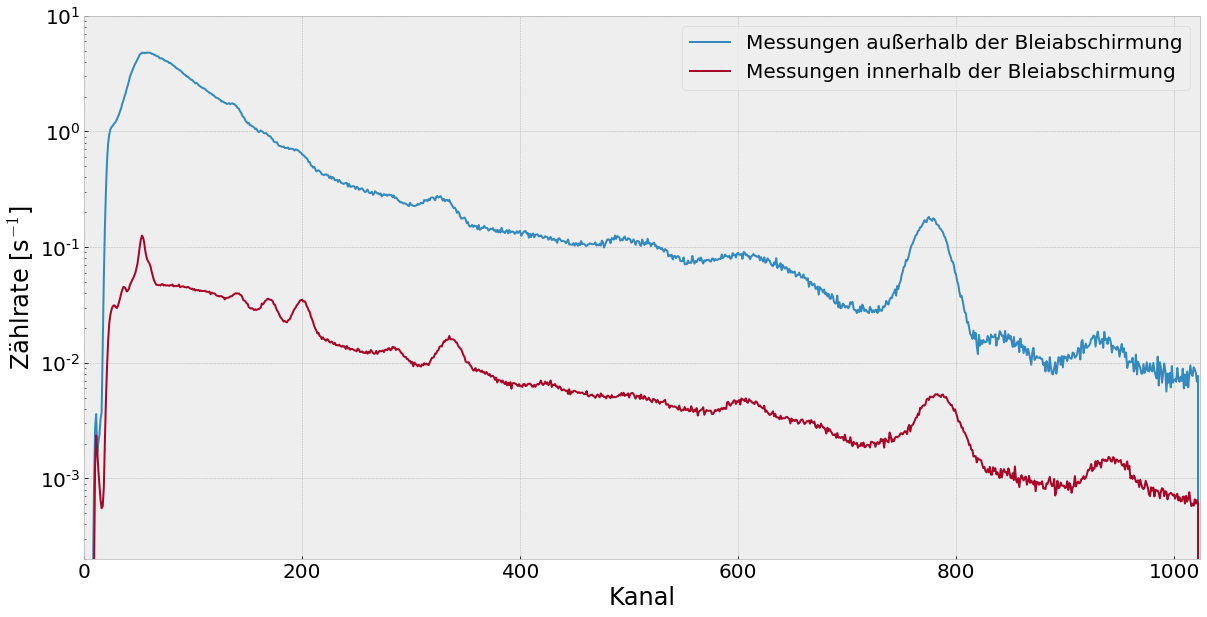

In [4]:
# Einlesen der Messwerte
_hintergrund_außen_daten    = np.genfromtxt("NaJ_Detektor_außen.Spe", dtype = int, skip_header=12, skip_footer=14)
_hintergrund_außen_messzeit = np.genfromtxt("NaJ_Detektor_außen.Spe", dtype = int, skip_header=9, skip_footer=1040)[0]
_hintergrund_innen_daten    = np.genfromtxt("NaJ_Detektor_innen.Spe", dtype = int, skip_header=12, skip_footer=14)
_hintergrund_innen_messzeit = np.genfromtxt("NaJ_Detektor_innen.Spe", dtype = int, skip_header=9, skip_footer=1040)[0]
# Plot der Messwerte
plt.plot(_hintergrund_außen_daten/_hintergrund_außen_messzeit, label = "Messungen außerhalb der Bleiabschirmung")
plt.plot(_hintergrund_innen_daten/_hintergrund_innen_messzeit, label = "Messungen innerhalb der Bleiabschirmung")
plt.xlabel("Kanal"), plt.ylabel(r"Zählrate [s$^{-1}$]"), plt.semilogy(), plt.ylim(2e-4, 1e1), plt.xlim(0,1024), plt.legend()
plt.show()

Wie zu erwarten haben beide Spektren einen vergleichbaren Verlauf, wobei die Messung innerhalb der Bleiabschirmung einen Größenordung kleiner ist. 

Für eine besser Vergleichbarkeit wird nun der Quotient geplottet:

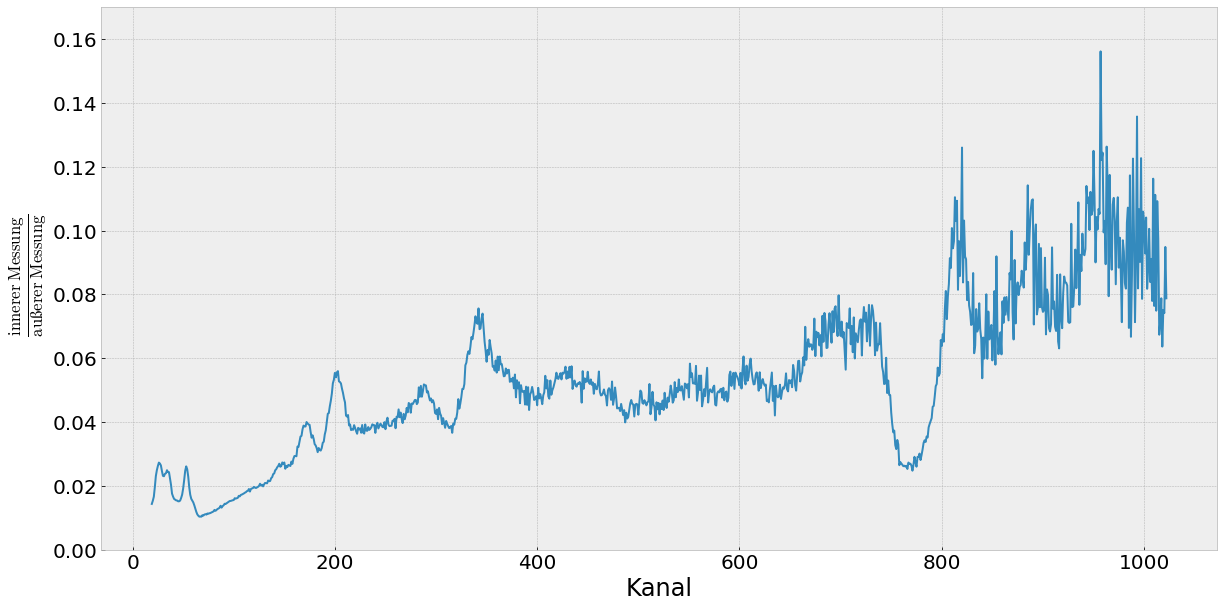

In [5]:
plt.plot(np.arange(19, 1023), _hintergrund_innen_daten[19:-1] / _hintergrund_außen_daten[19:-1]
         / (_hintergrund_innen_messzeit / _hintergrund_außen_messzeit))# ohne die verrauschten Messpunkte Anfang/Ende
plt.xlabel("Kanal"), plt.ylabel(r" $\frac{\mathrm{innerer \; Messung}}{\mathrm{außerer \; Messung}}$"), plt.ylim(0, 0.17)
plt.show()

Aus dem Quotient der Spektren lässt sich ablesen, dass die Abschrimung im Bereich niedrieger Energie sehr gut funktioniert und im hochenergetischen Bereich die Strahlung noch auf ein zehntel der Strahlung verringert.

### 3.2. Energie–Kalibrierung des high purity Germanium Detektors
Für eine grobe Energiekalibirung wird das Standard–Präparat Cs-137 vermessen. Mittels der Ein-Punkt-Energie-Kalibrierung im Messprogramm Maestro konnten nach der Messung des Standard-Präparat Eu-152 ein genauere Energie-Kalibrierung mit Gamma-W durchgeführt werden. Hier wurden die Peaks des vermessenen Spektrums anhand des Zertikats des verwendeten Standardpräparats identifziert. Daraus lässt sich ein Zusammenhang zwischen den Kanälen des Detektors und den Energien herstellen. Das Ergebis ist ein Polynom zweiter Ordnung um einem Kanal ($K$) eine Energie($E$) zuzuordnen:

E($K$) = ( 0.73701 + 0.20206·$K$ - 2.9174·10$^{-9}$$K^2$ ) keV

mit dem Fehler:

$\Delta$ E($K$) = (3.2794·10$^{-2}$ + 8.2292·10$^{-6}$·$K$ +1.4833·10$^{-9}$·$K^2$) keV


In [6]:
_Energy_coefficients = np.array([[7.222477E-01, 3.2794E-02], [2.029022E-01,8.2292E-06], [-2.912628E-09, 1.4833E-09]])
E_K = lambda K: _Energy_coefficients[0,0] + K * _Energy_coefficients[1,0] + K**2 * _Energy_coefficients[2,0] 

### 3.3. Bestimmung der Auflösung
Zur Bestimmung der Auflösung der Messapparatur wird die Halbwertsbreite einiger Full Energy Peaks berechnet.  Auch hierbei benutzen wir die in Gamma-W berechneten Werte. Aus deren Abhängigkeit von der Energie lässt sich die Energieaufösung berechnen:

$$\delta(E) = \dfrac{E}{FWHM(E)}$$
$$\delta(E) = \dfrac{E}{4.4089 + 7.3370·10^{-4}·E - 7.1110·10^{-9}·E^2}$$

mit dem Fehler
$$\Delta\delta(E) = \dfrac{E}{0.15369 + 4.5283·10^{-5}·E - 8.4096·10^{-9}·E^2}$$

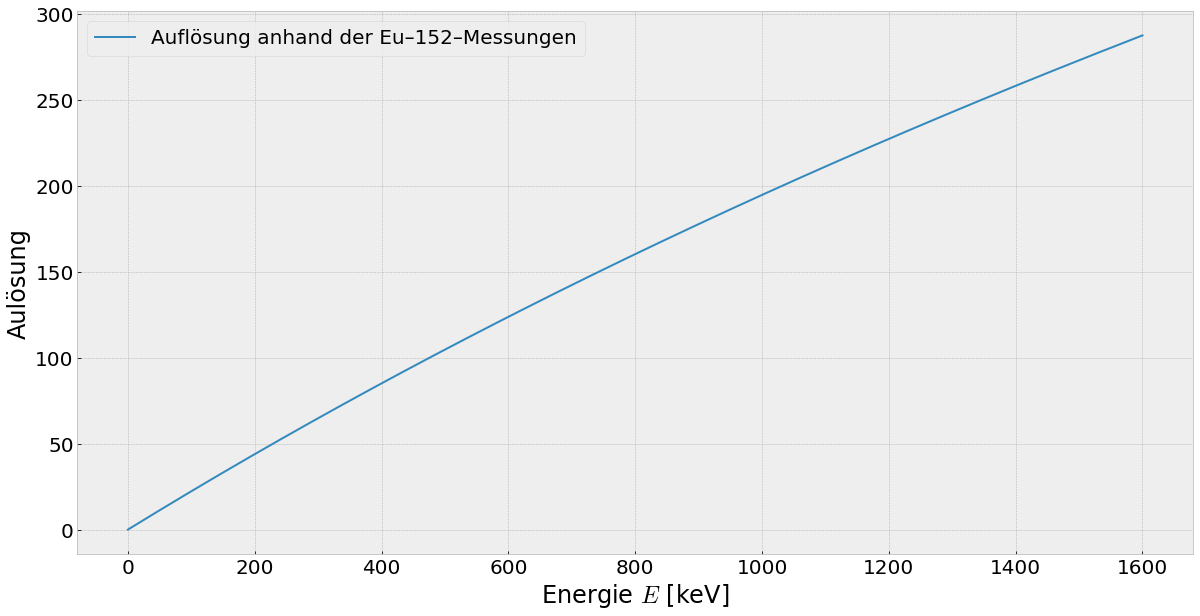

In [14]:
_FWHM = np.array([[4.4089E+00, 1.5369E-01], 
                  [7.3370E-04, 4.5283E-05], 
                  [-7.1110E-09, 8.4096E-09]])
_x = np.linspace(0,1600,200)
Auflösung = _x/(_FWHM[0,0] + _FWHM[1,0]*_x + _FWHM[2,0]*_x**2)
Fehler = _x/(_FWHM[0,1] + _FWHM[1,1]*_x + _FWHM[2,1]*_x**2) 
plt.plot(_x, Auflösung, label = "Auflösung anhand der Eu–152–Messungen") 
plt.xlabel("Energie $E$ [keV]"), plt.ylabel(r"Aulösung"), plt.legend(loc = 2)
plt.show()

### 3.4.1 Berechnung der theoretischen Aktivität
Aus den Daten des Zertifikats des PTB wird die Aktivität des Standardpräparats Eu-152 am Messtag berechnet:
$$A_{Theorie}(t) = A_0 \cdot \exp{\left(- \dfrac{\log{2}}{t_{1/2}}t\right)}
$$

In [9]:
_A_0 = 95.1e3 #Bq
_times = ['1987-01-01', '2017-12-04']
_HWZ = 13.52 #a

_zeiten = Time(_times, format='isot', scale='utc')
_dt = (_zeiten[1]- _zeiten[0]).value
_hwz = _HWZ * astru.yr
_t_1_2 = _hwz.to(astru.day).value

_A =  _A_0 * np.exp(- np.log(2) / _t_1_2 * _dt) #Bq
print(r"Die Aktivität am Messtag betrug theoretisch: A = %.2fkBq "%(_A/1000))

Die Aktivität am Messtag betrug theoretisch: A = 19.48kBq 


## 3.4.2 Bestimmung der Nachweiswahrscheinlichkeit 
### 1. Berücksichtigung des Raumwinkels
Da der Detektor nur die Strahlen messen kann, die in seine Raumwinkel abstrahlen, muss die Geometrie der Messanordung beachtet werden. Der Faktor für einer punktförmigen Strahlenquelle, die aus einer Entfernung $D$ Detektor mit endlichem Radius $R_d$ trifft, lautet:

$$\Omega_{punktförmig} = 2\pi\left(1 - \dfrac{1}{\sqrt{1+(D+R_d)^2}}\right)$$

In [10]:
D, R_d = sp.symbols("D R_d")
Ω_punkt = 2 * sp.pi *(1 - 1/(sp.sqrt(1+ (D + R_d)**2)))
Ω_punkt_fehler = Fehlerfunktionsgenerator(Ω_punkt, [D,R_d], "Ω_punkt", "Ω_punkt_fehler")

Funktion:  Ω_punkt


<IPython.core.display.Math object>

Absoluter Fehler: Ω_punkt_fehler  = Δ Ω_punkt


<IPython.core.display.Math object>

### 2. Anpassung der Efficiency
Mit Raumwinkel $\Omega$ und $N(E)$ als gemessene Zählrate und $t$ als Messzeit ergibt sich dann als Aktivität für die Probe:

$A_{Messung} = \dfrac{N(E)\cdot 4\pi}{t \cdot \Omega} $

Die theoretische Aktivität eines Peaks $A_{Theorie(E)}$ berechnet sich aus der theoretische Aktivität der Probe $A_t$ und der Übergangswahrscheinlichkeit p(E):

$A_{Theorie(E)} = A_t \cdot p(E)$

Daraus ergibt sich dann die Effciency als der Qutient:

$\epsilon(E) = \dfrac{A_{Messung(E)}}{A_{Theorie(E)}} =  \dfrac{N(E)\cdot 4\pi}{t \cdot \Omega \cdot A_t \cdot p(E)}$

In [11]:
N_E, t, p_E, A_t = sp.symbols("N_E t p_E A_t")
ε_E = N_E * 4 * sp.pi / (t * Ω_punkt * A_t * p_E)
ε_E_Fehler = Fehlerfunktionsgenerator(ε_E, [N_E, t, p_E, D, R_d, A_t], "ε_E", "ε_E_Fehler")

Funktion:  ε_E


<IPython.core.display.Math object>

Absoluter Fehler: ε_E_Fehler  = Δ ε_E


<IPython.core.display.Math object>

Die Anpassung der Efficiency wird mit der folgenden Formel vorgenommen:

$\epsilon(E) = \exp\left(\left((a + b\ln(E) + c\ln(E)^2) \dfrac{2}{\pi}\arctan\left(\exp(d + e \ln(E) + f\ln(E)^3\right)\right) − 25\right)$

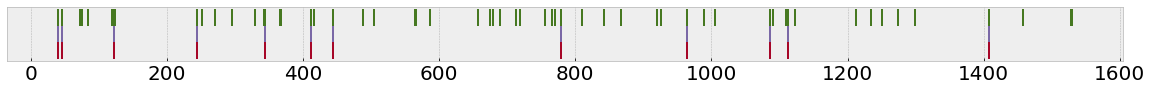

In [15]:
## Einlesen der Messdaten
_eu_theorie = np.array([
# Energie E, Emissionswahrscheinlichkeit p und deren Messfehler    
#   E in keV, p in %, Δp in %    nach Physikalisch-Technische Bundesanstalt (PTB)
    [(39.52+40.12)/2, 59.1, 1.2],
    [(45.4 + 46.6)/2, 14.9, 0.3],
    [ 121.78,  28.37, 0.24 ],
    [ 244.69,   7.51, 0.06 ],
    [ 344.27,  26.58, 0.18 ],
    [ 411.11,  2.234, 0.013],
    [ 443.98,  3.121, 0.018],
    [ 778.89,  12.96, 0.07 ],
    [ 964.12,  14.62, 0.06 ],
    [1085.78,  10.16, 0.05 ],
    [1112.02,  13.56, 0.06 ],
    [1407.95,  20.85, 0.09 ]]) 
# Struktur von _eu_messung:
# number, Position, Energy, DE, Area, DA(%), FWHM/keV, FIT, POFIF, QUAL
_eu_messung = np.loadtxt("eu152_Peaks_from_Gamma-W.dat")
_eu_messzeit = np.genfromtxt("eu152.Spe", dtype = int, skip_header=9, skip_footer=8208)[0]
_eu_energien = _eu_theorie[:, 0]

## Auswahl der gemessenen Peaks passend zum den PTB Peaks
_eu_auswahl = []
for _theoriewert in _eu_theorie[:,0]:
    _eu_auswahl.append(np.abs(_eu_messung[:,2]-_theoriewert).argmin())

## Kleine Darstellung der Peaks
plt.figure(figsize=(20,1)), plt.yticks([]), 
plt.vlines(_eu_theorie[:,0], 0,1, color="C1")             # Peaks des Zertifikats
plt.vlines(_eu_messung[_eu_auswahl,2], 1,2, color="C2")    # Ausgewählten Peaks aus Gamma-W
plt.vlines(_eu_messung[:,2], 2,3, color="C3")             # alle in Gamma-W erkannte Peaks
plt.show()

In [17]:
## Messwerte
_D    = 48e-3 #m
_dD   =  2e-3 #m
_R_d  = 35e-3 #m
_dR_d =  2e-3 #m
_dt   =     0 #s     Der systematische Fehler durch den PC ist zu vernachlässigen
_dA_t =     0 #Bq    kann ausgerechnet werden, da _A_0 = 95.1e3 mit 2% Genauigkeit angegeben ist

## Berechnung der Effciency für jeden Peak
_ε_E = []
_ε_E_Fehler = []
for _peak in range(len(_eu_auswahl)):
    _ε_E.append(float(sp.sympify(ε_E).subs(dict(
                                                        t = _eu_messzeit,
                                                        D = _D,
                                                        R_d = _R_d,
                                                        A_t = _A,
                                                        N_E = _eu_messung[_eu_auswahl[_peak],4],
                                                        p_E = _eu_theorie[_peak,1]
                                                    )).evalf()))
    _ε_E_Fehler.append(float(sp.sympify(ε_E_Fehler).subs(dict(
                                                        t = _eu_messzeit,
                                                        dt= _dt,
                                                        D = _D,
                                                        dD = _dD,
                                                        R_d = _R_d,
                                                        dR_d = _dR_d,
                                                        A_t = _A,
                                                        dA_t = _dA_t,
                                                        N_E = _eu_messung[_eu_auswahl[_peak],4],
                                                        dN_E = sp.sqrt(_eu_messung[_eu_auswahl[_peak],4],),
                                                        p_E = _eu_theorie[_peak,1],
                                                        dp_E = _eu_theorie[_peak,1] * _eu_theorie[_peak,2] # absoluter Fehler = relativer Fehler * Messwert
                                                    )).evalf()))

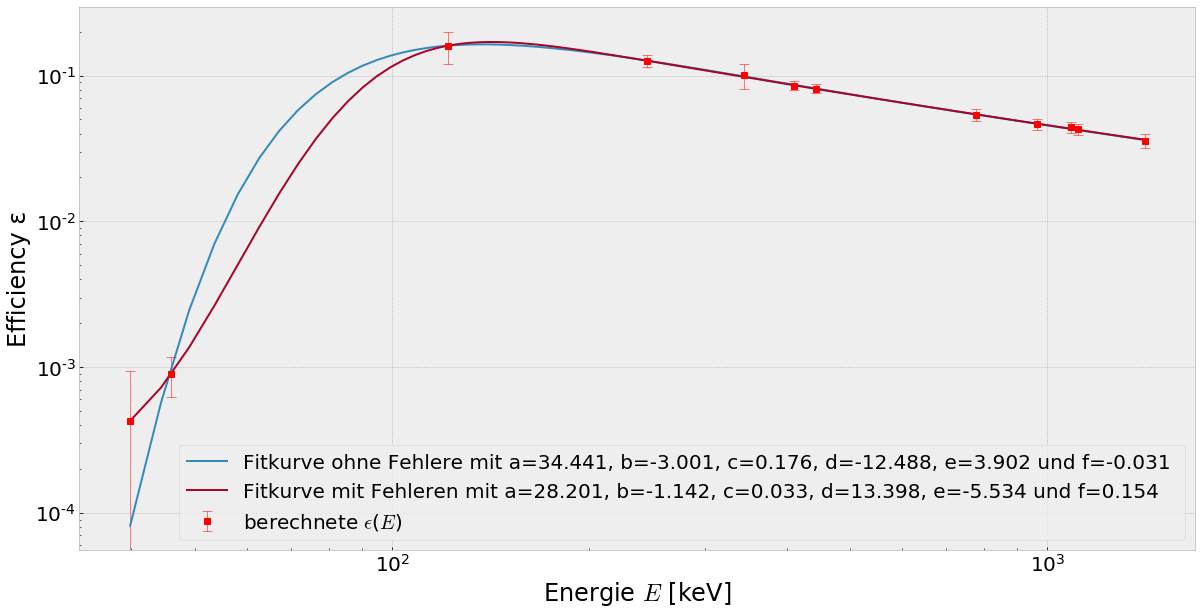

In [20]:
## Anpassung der Efficiency ohne Einbeziehung der Fehler auf ε
efficiency_fit = lambda E, a, b, c, d, e, f: np.exp(((a+b*np.log(E)+c*np.log(E)**2)
                                           *2/np.pi*
                                           np.arctan(np.exp(d+e*np.log(E)+f*np.log(E)**3)))-25)
(_a,_b,_c,_d,_e,_f) ,_pcov = curve_fit(efficiency_fit, _eu_energien, _ε_E, p0=[28,-1,0.1,2,-1,0.1])

# Plotten
_x = np.linspace(min(_eu_energien), max(_eu_energien), 300)
plt.plot(_x, efficiency_fit(_x, _a, _b, _c, _d, _e, _f),
         label = "Fitkurve ohne Fehlere mit a=%.3f, b=%.3f, c=%.3f, d=%.3f, e=%.3f und f=%.3f "%(_a,_b,_c,_d,_e,_f)) 
plt.errorbar(_eu_energien, _ε_E,yerr=_ε_E_Fehler,fmt="rs",linewidth=3,
    elinewidth=0.5,capsize=5, capthick=0.5,  label = "berechnete $\epsilon$($E$)")

## Anpassung der Efficiency mit Einbeziehung der Fehler auf ε
(_a,_b,_c,_d,_e,_f), _pcov = curve_fit(
                            efficiency_fit, _eu_energien, _ε_E, p0=[28,-1,0.08,-10,3,-0.01], 
                            sigma=_ε_E_Fehler, absolute_sigma=True)
# Plotten
plt.plot(_x, efficiency_fit(_x, _a, _b, _c, _d, _e, _f),
         label = "Fitkurve mit Fehleren mit a=%.3f, b=%.3f, c=%.3f, d=%.3f, e=%.3f und f=%.3f "%(_a,_b,_c,_d,_e,_f)) 
plt.xlabel("Energie $E$ [keV]"), plt.ylabel("Efficiency ε"), plt.legend(),
plt.loglog()

# Effizienzfitfunktion für spätere Berechnugen
ε_E_fit = lambda E: np.exp(((_a+_b*np.log(E)+_c*np.log(E)**2)
                            *2/np.pi*
                            np.arctan(np.exp(_d+_e*np.log(E)+_f*np.log(E)**3)))-25)
# Fehlerfunktion auf den Effizienzfit für spätere Berechnugen
(_a_f,_b_f,_c_f,_d_f,_e_f,_f_f) = np.sqrt(np.diag(_pcov))
ε_E_fit_fehler = lambda E: np.exp(((_a_f+_b_f*np.log(E)+_c_f*np.log(E)**2)
                            *2/np.pi*
                            np.arctan(np.exp(_d_f+_e_f*np.log(E)+_f_f*np.log(E)**3)))-25)

## 3.5. Analyse des Untergrundes

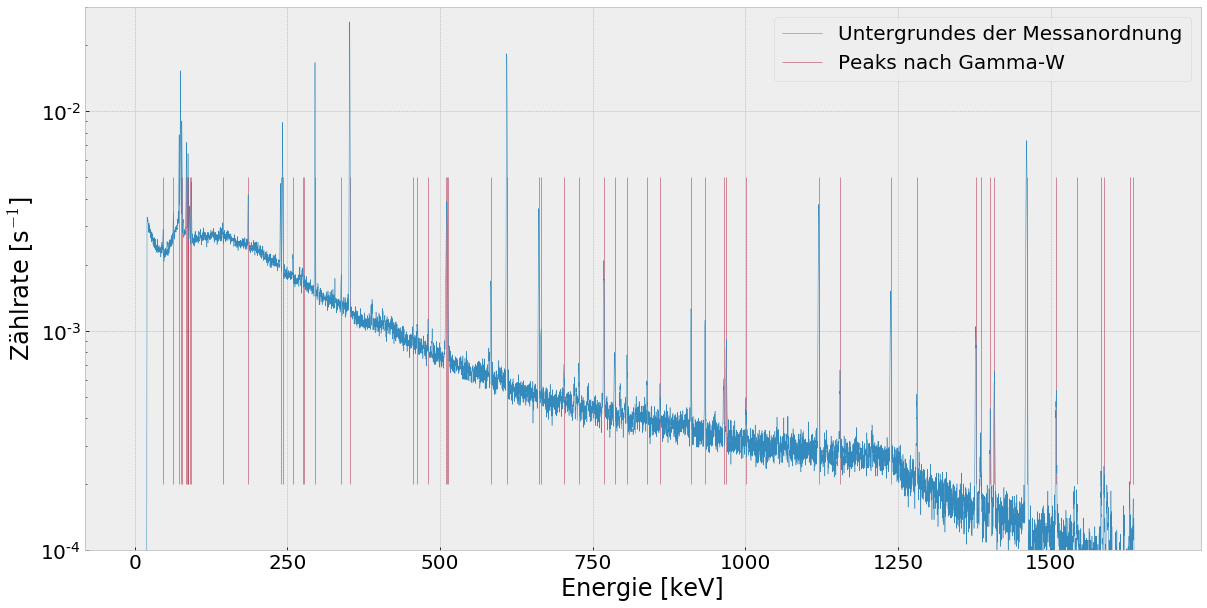

In [22]:
# Einlesen der Messwerte 
_Ge_0_daten    = np.genfromtxt("Untergrund(Ge).Spe", dtype = int, skip_header=12, skip_footer=14)
_Ge_0_messzeit = np.genfromtxt("Untergrund(Ge).Spe", dtype = int, skip_header=9, skip_footer=8208)[0]
_O_Peaks = np.loadtxt("Untergrund(Ge)_Peaks_from_Gamma-W.dat")
_Ge_0_zählrate = _Ge_0_daten/_Ge_0_messzeit
_Energie = E_K(np.arange(len(_Ge_0_zählrate)))

# Plot der reinen Messergebnisse
plt.vlines(_O_Peaks[:,2], 5e-3,2e-4, color="C1", linestyles="-", linewidth=0.7, alpha=0.6, label = "Peaks nach Gamma-W")
plt.plot(_Energie, _Ge_0_zählrate, "-", lw = 0.5, label = "Untergrundes der Messanordnung")
plt.ylim(1e-4,3e-2)
plt.xlabel("Energie [keV]"), plt.ylabel(r"Zählrate [s$^{-1}$]"), plt.semilogy(), plt.legend()
plt.show()

In [24]:
# number, Position, Energy, DE, Area, DA(%), FWHM/keV, FIT, POFIF, QUAL
_O_Peaks_Auswahl = _O_Peaks[_O_Peaks[:,4] > 3000]       # Filter alle stärkeren Peaks raus
_Untergrund_daten = _O_Peaks_Auswahl[:,[0,2,4,5]]       # number, Energiy, Area, DA(%)

$$A = \dfrac{N (E)}{t \cdot \epsilon(E)}
$$

$$
\Delta A = \sqrt{\left(\dfrac{\Delta N(E)}{t \cdot \epsilon (E)}\right)^2+\left(\dfrac{N(E) \cdot \Delta \epsilon }{t \cdot \epsilon (E)^2}\right)^2}
$$

In [25]:
_N_E   = _Untergrund_daten[:,2]
_t     = _Ge_0_messzeit
_E     = _Untergrund_daten[:,1]
_ε_E   = ε_E_fit(_E)
_Δ_N_E = _Untergrund_daten[:,3]*_N_E
_Δ_ε_E = ε_E_fit_fehler(_E) * _ε_E

_A = _N_E / (_t * _ε_E)
_Δ_A = np.sqrt((_Δ_N_E / (_t * _ε_E))**2 
                                          + (_N_E * _Δ_ε_E / (_t * _ε_E**2))**2)

_Isotop = ["-","-","Pa-231","-","-",
         "-","-","-","-","-",
         "-","-","-","-","-",
         "-","Cs-137","-","-","-",
         "-","-","-"]
_Mutterisotop = ["-","-","Th-231","-","-",
         "-","-","-","-","-",
         "-","-","-","-","-",
         "-","-","-","-","-",
         "-","-","-"]
_Zerfallsreihe = ["-","-","Uran-Actinium","-","-",
         "-","-","-","-","-",
         "-","-","-","-","-",
         "-","-","-","-","-",
         "-","-","-"]

_Legende = [["Nummer","Energie [keV]", "Aktivität [Bq]",
             " ΔAktivität [Bq]", "Isotop", "Mutterisotop","Zerfallsreihe"]]
_Werte   = np.column_stack((_Untergrund_daten[:,0], _E, _A, _Δ_A))
_Werte   = np.around(_Werte, decimals=4)
_Werte   = np.column_stack((_Werte, _Isotop, _Mutterisotop, _Zerfallsreihe))
mehr_infos = np.concatenate((_Legende,_Werte), axis=0)
tabelle_darstellen(mehr_infos)

Nummer,Energie [keV],Aktivität [Bq],ΔAktivität [Bq],Isotop,Mutterisotop,Zerfallsreihe
3.0,72.9,0.8348,2.0871,-,-,-
4.0,75.0,1.821,3.6419,-,-,-
5.0,77.2,0.8145,1.9547,Pa-231,Th-231,Uran-Actinium
7.0,85.0,0.2853,0.9414,-,-,-
8.0,87.0,0.12,0.6483,-,-,-
9.0,87.5,0.1736,0.6597,-,-,-
11.0,92.8,0.1346,0.5922,-,-,-
13.0,185.9,0.0678,0.5629,-,-,-
14.0,238.8,0.1235,0.5928,-,-,-
15.0,242.2,0.3168,1.0772,-,-,-


## 3.6. Analyse einer unbekannten Probe

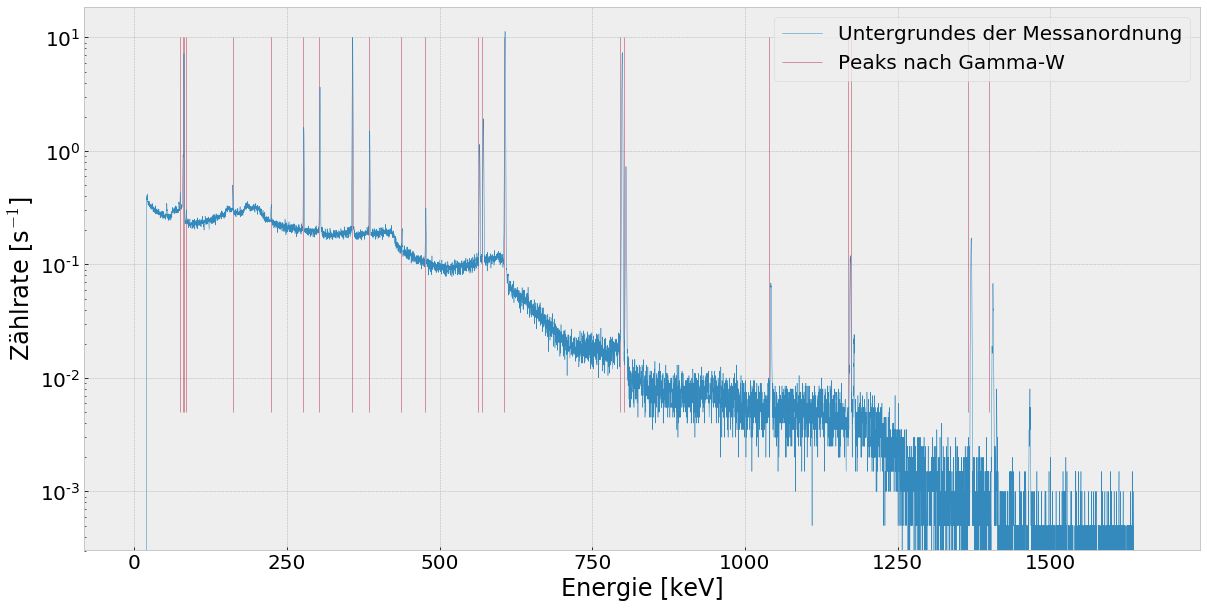

In [26]:
# Einlesen der Messwerte 
_unknown_daten    = np.genfromtxt("unknown_sample.Spe", dtype = int, skip_header=12, skip_footer=14)
_unknown_messzeit = np.genfromtxt("unknown_sample.Spe", dtype = int, skip_header=9, skip_footer=8208)[0]
_unknown_Peaks = np.loadtxt("unknown_sample_Peaks_from_Gamma-W.dat")
_unknown_zählrate = _unknown_daten/_unknown_messzeit
_Energie = E_K(np.arange(len(_unknown_zählrate)))

# Plot der reinen Messergebnisse
plt.vlines(_unknown_Peaks[:,2], 5e-3,1e1, color="C1", linestyles="-", linewidth=0.8,alpha=0.5, label = "Peaks nach Gamma-W")
plt.plot(_Energie, _unknown_zählrate, "-", lw = 0.5, label = "Untergrundes der Messanordnung")
plt.xlabel("Energie [keV]"), plt.ylabel(r"Zählrate [s$^{-1}$]"), plt.semilogy(), plt.legend()
plt.show()

In [28]:
# number, Position, Energy, DE, Area, DA(%), FWHM/keV, FIT, POFIF, QUAL
_unknown_Daten = _unknown_Peaks[:,[0,2,4,5]]       # number, Energiy, Area, DA(%)

$$A = \dfrac{N (E)}{t \cdot \epsilon(E)} \dfrac{4π}{Ω}
$$

$$
\Delta A = \sqrt{\left(\dfrac{\Delta N(E)}{t \cdot \epsilon (E)}\right)^2+\left(\dfrac{N(E) \cdot \Delta \epsilon }{t \cdot \epsilon (E)^2}\right)^2}
$$

In [29]:
N_E, t, ε_E, Ω = sp.symbols("N_E t ε_E Ω")
A_peak = N_E * 4 * sp.pi / (t * ε_E * Ω)
A_peak_Fehler = Fehlerfunktionsgenerator(A_peak, [N_E, t, ε_E, Ω], "A_peak", "A_peak_Fehler")

Funktion:  A_peak


<IPython.core.display.Math object>

Absoluter Fehler: A_peak_Fehler  = Δ A_peak


<IPython.core.display.Math object>

In [35]:
_N_E   = _unknown_Daten[:,2]
_t     = _unknown_messzeit
_E     = _unknown_Daten[:,1]
_ε_E   = ε_E_fit(_E)
_Δ_N_E = _unknown_Daten[:,3]*_N_E
_Δ_ε_E = ε_E_fit_fehler(_E) * _ε_E
_Ω     = float(Ω_punkt.subs(dict(D = _D, R_d = _R_d)))
_Ω_Fehler     = float(Ω_punkt_fehler.subs(dict(D = _D, R_d = _R_d, dD = 2e-3, dR_d = 2e-3)))

_Peakzählraten = []
_Δ_Peakzählraten = []
for _peak in range(len(_N_E)):
    _Peakzählraten.append(float(sp.sympify(A_peak).subs(dict(
                                                        t = _t,
                                                        Ω = _Ω,
                                                        N_E = _N_E[_peak],
                                                        ε_E = _ε_E[_peak]
                                                    )).evalf()))
    _Δ_Peakzählraten.append(float(sp.sympify(A_peak_Fehler).subs(dict(
                                                        t = _t,
                                                        dt = 0,
                                                        Ω = _Ω,
                                                        dΩ = _Ω_Fehler,
                                                        N_E = _N_E[_peak],
                                                        dN_E = _Δ_N_E[_peak],
                                                        ε_E = _ε_E[_peak],
                                                        dε_E = _Δ_ε_E[_peak]
                                                    )).evalf()))

_Isotop = ["X-Ray","BA-133","BA-133","X-Ray","BA-133",
         "BA-133","BA-133","BA-133","BA-133","BA-133",
         "D-Linie BA","Cs-137","Cs-137","Cs-137","Cs-137",
         "Cs-137","Cs-137","Cs-137","Cs-137","CO-60",
         "Cs-137","D-Linie CS"]
_Übergangswahrscheinlichkeit = [ np.nan, 2.62, 34.06, np.nan, 0.645,
         0.450, 7.164, 18.33, 62.05, 8.94,
         np.nan, 1.486, 8.35, 15.38, 97.62,
         85.53, 8.69, 0.988, 1.789, np.nan,
         3.014, np.nan]
_A_probe = ["-","-","-","-","-", # Ist zu berechnen aus _A_probe/p(E)
         "-","-","-","-","-",
         "-","-","-","-","-",
         "-","-","-","-","-",
         "-","-"]
_Legende = [["Nummer","Energie [keV]", "$A_{peak}$ [Bq]",
             " $ΔA_{peak}$ [Bq]", "Isotop", "p(E)","$A_{Probe}$","$\Delta A_{Probe}$"]]
_Werte   = np.column_stack(( _E, _Peakzählraten, _Δ_Peakzählraten))
_Werte   = np.around(_Werte, decimals=4)
_Werte   = np.column_stack((_unknown_Daten[:,0].astype(int), _Werte, 
                            _Isotop, _Übergangswahrscheinlichkeit,_A_probe,_A_probe))
mehr_infos = np.concatenate((_Legende,_Werte), axis=0)
tabelle_darstellen(mehr_infos)

Nummer,Energie [keV],$A_{peak}$ [Bq],$ΔA_{peak}$ [Bq],Isotop,p(E),$A_{Probe}$,$\Delta A_{Probe}$
1,74.9,9864.8344,104569.3841,X-Ray,nan,-,-
2,79.5,32821.666,124742.1841,BA-133,2.62,-,-
3,80.9,371569.7001,446594.8629,BA-133,34.06,-,-
4,84.7,2852.7847,50779.9355,X-Ray,nan,-,-
5,160.7,3739.2437,44123.8038,BA-133,0.645,-,-
6,223.2,2402.3658,37957.7298,BA-133,0.45,-,-
7,276.4,42364.3312,148302.9955,BA-133,7.164,-,-
8,302.9,107276.7721,268290.6445,BA-133,18.33,-,-
9,356.0,359211.6204,539369.0405,BA-133,62.05,-,-
10,383.9,53113.1949,132832.0159,BA-133,8.94,-,-


## 3.8 Analyse der Lebensmittelprobe:

Berechung der Raumwinkel der Strahlung einer zylinderförmigen Probe mit Radius $R_s$, Höhe $H_s$:
$
\Omega_c = (4\pi/(R_s^2H_s))\int_{-H_s/2}^{H_s/2}\int_0^{R_s}(D+h)[((D+h)^2 +r^2)^{-1/2}-((D+h)^2+R_d^2+r^2)^{-1/2}]r\text{d}r\text{d}h
$


In [21]:
d = 5                    #Abstand von Heidelbeeren zum Detektor
dd = 2                      #Fehler von Heidelbeerenabstand
hs = 5
dhs = 2
rd = 5
drd = 0.5
rs = 5
drs = 2
Hs, D, Rs, Rd, h, r = sp.symbols('Hs D Rs Rd h r')
ad=(D+h)
a=ad*((ad**2 + r**2)**(-1/2) - (ad**2 + Rd**2 + r**2)**(-1/2))*r
b = sp.integrate(a, (r, 0, Rs))
c = sp.integrate(b, (h, -Hs/2, Hs/2))
aa = (4 * sp.pi.evalf() / (Rs**2 * Hs))*c
raumwin_tschernobyl = aa.subs({Hs:hs, Rs:rs, Rd:rd, D:d})
ablt_Hs = sp.diff(aa,Hs)
ablt_Rs = sp.diff(aa,Rs)
ablt_Rd = sp.diff(aa,Rd)
ablt_D = sp.diff(aa,D)
dlt_Hs = dhs
dlt_Rs = drs
dlt_Rd = drd
dlt_D = dd
flr_Hs = abs(dlt_Hs * ablt_Hs.subs({Hs:hs, Rs:rs, Rd:rd, D:d}))
flr_Rs = abs(dlt_Rs * ablt_Rs.subs({Hs:hs, Rs:rs, Rd:rd, D:d}))
flr_Rd = abs(dlt_Rd * ablt_Rd.subs({Hs:hs, Rs:rs, Rd:rd, D:d}))
flr_D = abs(dlt_D * ablt_D.subs({Hs:hs, Rs:rs, Rd:rd, D:d}))
fehler_raumwinkel_tschernobyl = flr_Hs + flr_Rs + flr_Rd + flr_D